# ST445: Managing and Visualizing Data

## Matplotlib Primer: Bar Plots and Stem Plots

### Milan Vojnovic and Christine Yuen, MT 2017
---

## Preparation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Errorbar plots

First we show how to display error bars in a simple plot. 

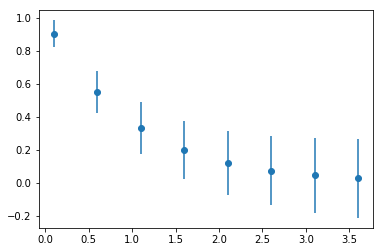

In [2]:
# example data
x2 = np.arange(0.1, 4, 0.5)
y2 = np.exp(-x2)

# example variable error bar values
yerr = 0.05 + 0.1*np.sqrt(x2)

# First illustrate basic pyplot interface, using defaults where possible.
plt.figure()
plt.errorbar(x2, y2, yerr=yerr, fmt='o')
plt.show()

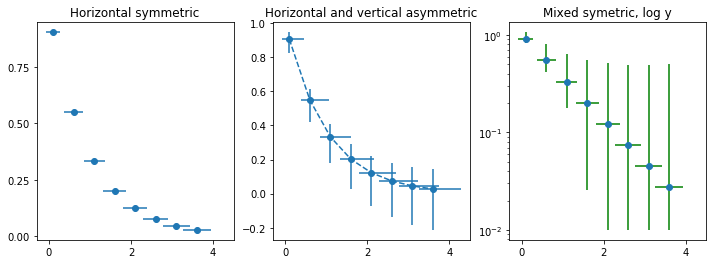

In [3]:
fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(12,4))

ax = axs[0]
xerr = 0.1 + yerr
ax.errorbar(x2, y2, xerr=xerr, fmt='o')
ax.set_title('Horizontal symmetric')
ax.locator_params(nbins=4)

ax = axs[1]
ax.errorbar(x2, y2, yerr=[yerr, 0.5*yerr], xerr=[xerr, 2*xerr], fmt='--o')
ax.set_title('Horizontal and vertical asymmetric')

ax = axs[2]
ax.set_yscale('log')
# Here we have to be careful to keep all y values positive:
ylower = np.maximum(1e-2, y2 - yerr)
yerr_lower = y2 - ylower
ax.errorbar(x2, y2, yerr=[yerr_lower, 2*yerr], xerr=xerr,
            fmt='o', ecolor='g', capthick=2)
ax.set_title('Mixed symetric, log y')

plt.show()

## Bar plots

### Vertical and horizontal bars

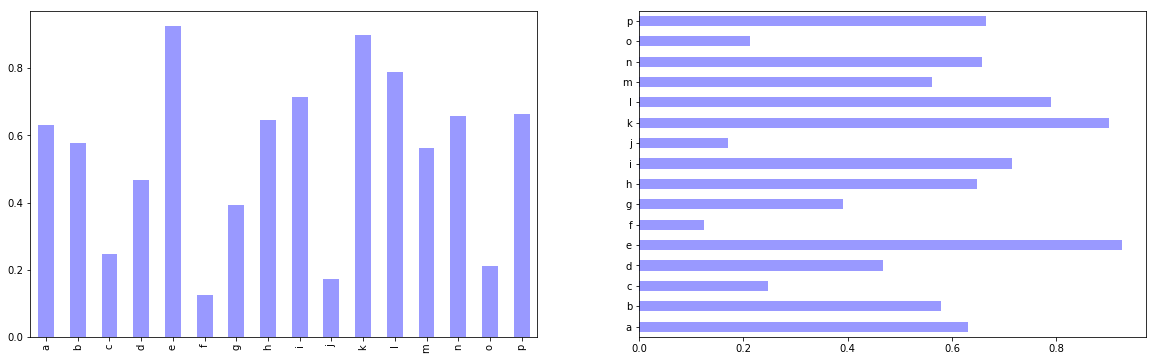

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,6))

df2 = pd.Series(np.random.rand(16),  index=list('abcdefghijklmnop'))
df2.plot(kind='bar', color='b', ax=axes[0], alpha=0.4)
df2.plot(kind='barh', color='b', ax=axes[1], alpha=0.4);
plt.show()

## Grouped bar plots vs stacked bar plots

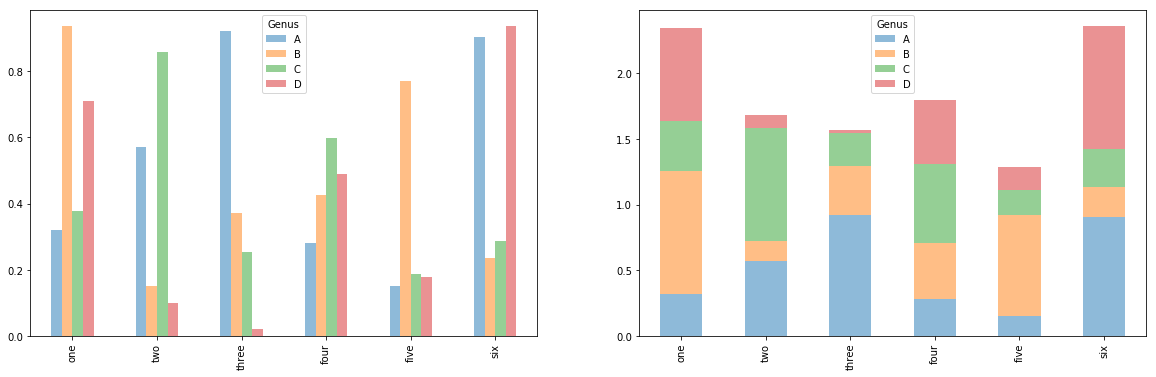

In [5]:
df3 = pd.DataFrame(np.random.rand(6, 4),
               index=['one', 'two', 'three', 'four', 'five', 'six'],
               columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
df3.plot(kind='bar', alpha=0.5, ax=axes[0])
df3.plot(kind='bar', stacked=True, alpha=0.5, ax=axes[1]);
plt.show()

## Bar plots with error bars

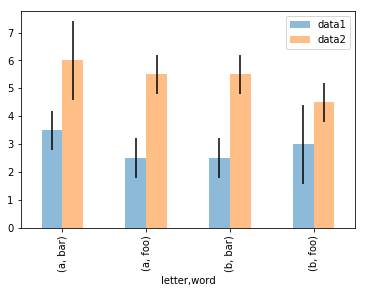

In [6]:
ix4 = pd.MultiIndex.from_arrays([['a', 'a', 'a', 'a', 'b', 'b', 'b', 'b'], 
                                 ['foo', 'foo', 'bar', 'bar', 'foo', 'foo', 'bar', 'bar']], 
                                 names=['letter', 'word'])
df4 = pd.DataFrame({'data1': [3, 2, 4, 3, 2, 4, 3, 2], 'data2': [6, 5, 7, 5, 4, 5, 6, 5]}, index=ix4)

# Group by index labels and take the means and standard deviations for each group
gp = df4.groupby(level=('letter', 'word'))
means = gp.mean()
errors = gp.std()

# Plot
fig, ax = plt.subplots()
means.plot.bar(yerr=errors, ax=ax, alpha=0.5);
plt.show()

## Changing the colours of bars and axes
### Changing the colour of a specific bar

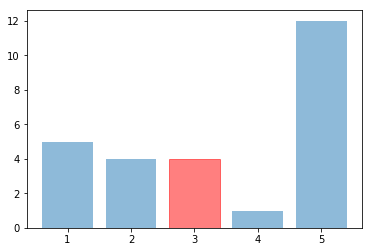

In [7]:
fig = plt.figure()

s2 = pd.Series(
    [5, 4, 4, 1, 12],
    index = ["AK", "AX", "GA", "SQ", "WN"]
)

ax = fig.add_subplot(1,1,1)

ax.bar([1,2,3,4,5], s2.values, alpha=0.5)
# change the colour of the third bar 
ax.get_children()[2].set_color('r') 
plt.show()

### Changing the colour of all bars and axes

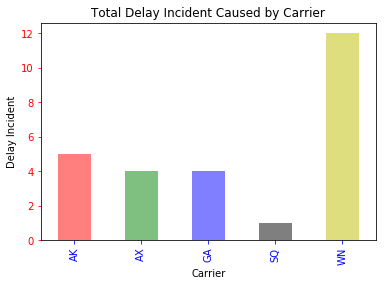

In [8]:
#Set descriptions:
plt.title("Total Delay Incident Caused by Carrier")
plt.ylabel('Delay Incident')
plt.xlabel('Carrier')

#Set tick colors:
ax = plt.gca()
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='red')

#Plot the data:
my_colors = 'rgbkymc'  # red, green, blue, black, etc.

s2.plot(kind='bar', color=my_colors, alpha=0.5)

plt.show()

## Stem Plot

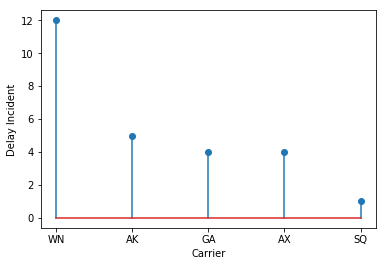

In [22]:
fig, ax = plt.subplots()
sorted_s2 = s2.sort_values(ascending=False)
ax.stem(sorted_s2.values)
plt.ylabel('Delay Incident')
plt.xlabel('Carrier')
ax.set_xticklabels(sorted_s2.index)
plt.xticks(range(0,5))
plt.show()